In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import tree

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [13]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [17]:
columns = list(df_train.columns)

In [20]:
df_train.corr().IN_TREINEIRO.sort_values(ascending=False).head(30)

IN_TREINEIRO               1.000000
TP_ST_CONCLUSAO            0.533983
TP_PRESENCA_CN             0.094692
TP_PRESENCA_CH             0.094692
TP_PRESENCA_LC             0.092454
TP_PRESENCA_MT             0.092454
Q034                       0.055265
Q039                       0.040348
Q005                       0.033411
Q038                       0.018855
TP_COR_RACA                0.009676
Unnamed: 0                 0.006717
TP_STATUS_REDACAO          0.006688
Q040                       0.005270
IN_SABATISTA               0.003824
IN_DEFICIENCIA_AUDITIVA    0.000873
Q032                      -0.000943
IN_DISLEXIA               -0.003297
IN_MEDIDOR_GLICOSE        -0.003297
IN_SALA_ESPECIAL          -0.003297
IN_DISCALCULIA            -0.003297
IN_MEDICAMENTOS           -0.003297
IN_IDOSO                  -0.004663
IN_DEFICIENCIA_MENTAL     -0.004663
IN_DEFICIT_ATENCAO        -0.004848
IN_LEITURA_LABIAL         -0.005711
IN_MESA_CADEIRA_RODAS     -0.006595
IN_SURDEZ                 -0

In [21]:
df_train.corr().IN_TREINEIRO.sort_values(ascending=False).tail(30)

CO_ESCOLA                     NaN
CO_MUNICIPIO_ESC              NaN
CO_UF_ESC                     NaN
TP_DEPENDENCIA_ADM_ESC        NaN
TP_LOCALIZACAO_ESC            NaN
TP_SIT_FUNC_ESC               NaN
IN_CEGUEIRA                   NaN
IN_SURDO_CEGUEIRA             NaN
IN_AUTISMO                    NaN
IN_ESTUDA_CLASSE_HOSPITALAR   NaN
IN_BRAILLE                    NaN
IN_GUIA_INTERPRETE            NaN
IN_MACA                       NaN
IN_COMPUTADOR                 NaN
IN_CADEIRA_ESPECIAL           NaN
IN_CADEIRA_CANHOTO            NaN
IN_CADEIRA_ACOLCHOADA         NaN
IN_PROVA_DEITADO              NaN
IN_MOBILIARIO_OBESO           NaN
IN_LAMINA_OVERLAY             NaN
IN_PROTETOR_AURICULAR         NaN
IN_MAQUINA_BRAILE             NaN
IN_SOROBAN                    NaN
IN_MARCA_PASSO                NaN
IN_SONDA                      NaN
IN_SALA_INDIVIDUAL            NaN
IN_SALA_ACOMPANHANTE          NaN
IN_MOBILIARIO_ESPECIFICO      NaN
IN_MATERIAL_ESPECIFICO        NaN
CO_UF_ENTIDADE

In [40]:
columns_corr_train = ['IN_TREINEIRO', 'TP_ST_CONCLUSAO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
                      'TP_PRESENCA_MT']

In [41]:
columns_corr_test = ['TP_ST_CONCLUSAO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT']

In [42]:
plt.style.use('ggplot')

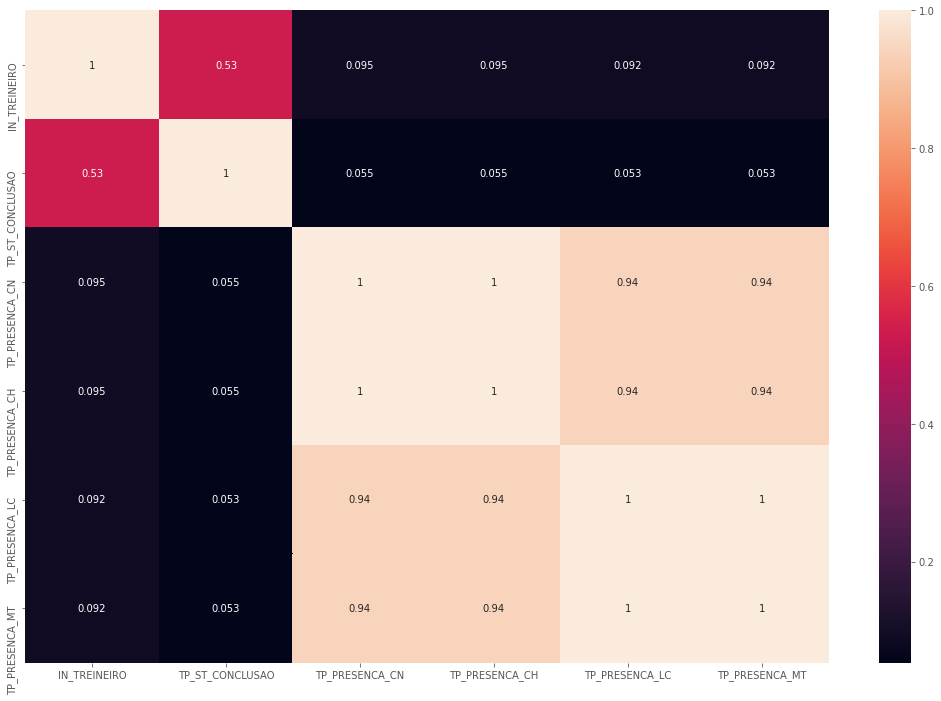

In [43]:
corr = df_train[columns_corr_train].corr()
ax = plt.subplots(figsize=(18, 12))
sns.heatmap(corr,  annot=True, annot_kws={"size": 10})

In [44]:
train_isna = df_train[columns_corr_train].isna().sum().sum()
print(f'A quantidade de dados nulos no data frame de traino: {train_isna}')

A quantidade de dados nulos no data frame de traino: 0


In [45]:
test_isna = df_test[columns_corr_test].isna().sum().sum()
print(f'A quantidade de dados nulos no data frame de traino: {test_isna}')

A quantidade de dados nulos no data frame de traino: 0


In [49]:
x_train = df_train[columns_corr_test]
y_train = df_train.IN_TREINEIRO
x_test = df_test[columns_corr_test]

In [47]:
y_train.unique()

array([0, 1])

### LinearRegression

In [104]:
model = LinearRegression()

In [105]:
model.fit(x_train, y_train)

LinearRegression()

In [106]:
y_test = model.predict(x_test)

In [107]:
y_test

array([-0.03684065, -0.06724649,  0.36801317, ..., -0.01552413,
        0.18686845, -0.01552413])

In [111]:
answer = pd.DataFrame()
answer['NU_INSCRICAO'] =  df_test.NU_INSCRICAO
answer['IN_TREINEIRO'] =  y_test

In [112]:
answer.IN_TREINEIRO.unique()

array([-0.03684065, -0.06724649,  0.36801317,  0.18686845, -0.01552413,
        0.33760958,  0.38926103,  0.16558244,  0.59165361,  0.13518155,
        0.54003761, -0.0460417 ,  0.15635087,  0.35874345,  0.57044389,
        0.00571611,  0.56138017,  0.41050127])

### RandomForestRegressor

In [99]:
modelRF = RandomForestRegressor()

In [100]:
modelRF.fit(x_train, y_train)

RandomForestRegressor()

In [101]:
y_testRF = modelRF.predict(x_test)

In [113]:
answerRF = pd.DataFrame()
answerRF['NU_INSCRICAO'] =  df_test.NU_INSCRICAO
answerRF['IN_TREINEIRO'] =  y_testRF

In [114]:
answerRF.IN_TREINEIRO.unique()

array([0.        , 0.77050089, 0.59922529, 0.81176685, 0.70499595])

### DecisionTreeClassifier

In [88]:
clf = tree.DecisionTreeClassifier()

In [89]:
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [96]:
y_testCLF = clf.predict(x_test)

In [97]:
answerDTC = pd.DataFrame()
answerDTC['NU_INSCRICAO'] =  df_test.NU_INSCRICAO
answerDTC['IN_TREINEIRO'] =  y_testCLF

In [98]:
answerDTC.IN_TREINEIRO.value_counts()

0    3816
1     754
Name: IN_TREINEIRO, dtype: int64

In [115]:
answerDTC.to_csv('answer.csv', index=False)

In [116]:
pd.read_csv('answer.csv')



,NU_INSCRICAO,IN_TREINEIRO
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,0
1,177f281c68fa032aedbd842a745da68490926cd2,0
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,1
3,5c356d810fa57671402502cd0933e5601a2ebf1e,0
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,0
...,...,...
4565,361b7fcd8867119550fe2af5aa729ffad89a7cf5,0
4566,d8a0e4c9e29494cc9bba2422bd79333931475ee1,0
4567,3f1c3388244df8d6521e983a809292d9f3bca643,0
4568,1778e9c4cef591beb6b986d191d15ed05de816b0,0
